In [6]:
%pylab inline
import os
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [18]:
data_rt = "archive/router_targeted/2017-10-07 13:50:31 bfb4f6a/targeted_router.csv"
data_rr = [
    "archive/router_random/2017-10-08 11:47:42 4717097/targeted_router.csv",
    "archive/router_random 1/2017-10-08 20:34:54 be0a099 /targeted_router.csv",
    "archive/router_random 2/2017-10-08 20:34:47 be0a099 /targeted_router.csv",
    "archive/router_random 3/2017-10-08 20:34:47 be0a099 /targeted_router.csv",
    "archive/router_random 4/2017-10-08 20:34:48 be0a099 /targeted_router.csv",
    "archive/router_random 5/2017-10-08 20:34:48 be0a099 /targeted_router.csv",
    "archive/router_random 6/2017-10-08 20:34:48 be0a099 /targeted_router.csv",
    "archive/router_random 7/2017-10-08 20:34:48 be0a099 /targeted_router.csv",
    "archive/router_random 8/2017-10-08 20:34:48 be0a099 /targeted_router.csv",
    "archive/router_random 9/2017-10-08 20:34:49 be0a099 /targeted_router.csv",
]
data_rbt10 = [
    "archive/router_targeted_10/2017-10-19 12:28:31 b845222 3/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:31 b845222 4/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 1/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 2/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 5/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 6/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 7/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:32 b845222 8/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:33 b845222 10/stats.csv",
    "archive/router_targeted_10/2017-10-19 12:28:34 b845222 9/stats.csv"]
data_rbt90 = [
    "archive/router_targeted_90/2017-10-19 12:24:20 b845222 2/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:20 b845222 3/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:20 b845222 4/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:21 b845222 10/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:21 b845222 5/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:21 b845222 6/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:21 b845222 9/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:23 b845222 7/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:23 b845222 8/stats.csv",
    "archive/router_targeted_90/2017-10-19 12:24:25 b845222 1/stats.csv"
]
data_rbr10 = [
]
data_rbr90 = [
]

In [19]:
df_router_targ = pd.read_csv(data_rt)
df_router_rand = pd.concat([pd.read_csv(x) for x in data_rr])
df_rw_targ10 = pd.concat([pd.read_csv(x) for x in data_rbt10])
df_rw_targ90 = pd.concat([pd.read_csv(x) for x in data_rbt90])
#df_rw_rand10 = pd.concat([pd.read_csv(x) for x in data_rbr10])
#df_rw_rand90 = pd.concat([pd.read_csv(x) for x in data_rbr90])

In [20]:
df_router_targ["fraction"] = df_router_targ["removed"] / df_router_targ["node_count"]
df_router_rand["fraction"] = df_router_rand["removed"] / df_router_rand["node_count"]
df_rw_targ10["fraction"] = df_rw_targ10["removed"] / df_rw_targ10["node_count"]
df_rw_targ90["fraction"] = df_rw_targ90["removed"] / df_rw_targ90["node_count"]
#df_rw_rand90["fraction"] = df_rw_rand90["removed"] / df_rw_rand90["node_count"]
df_router_targ = df_router_targ[df_router_targ["removed"] < 500]
df_router_rand = df_router_rand[df_router_rand["removed"] < 500]
df_rw_targ10 = df_rw_targ10[df_rw_targ10["removed"] < 500]
df_rw_targ90 = df_rw_targ90[df_rw_targ90["removed"] < 500]
#df_rw_rand90 = df_rw_rand90[df_rw_rand90["removed"] < 500]


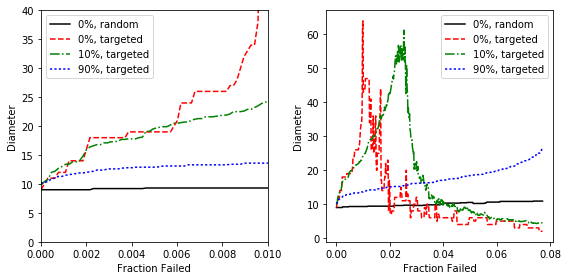

In [23]:
figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(df_router_rand.groupby(["fraction"])["diameter"].mean(), 'k-', label="0%, random")
plt.plot(df_router_targ.groupby(["fraction"])["diameter"].mean(), 'r--', label="0%, targeted")
plt.plot(df_rw_targ10.groupby(["fraction"])["diameter"].mean(), 'g-.', label="10%, targeted")
plt.plot(df_rw_targ90.groupby(["fraction"])["diameter"].mean(), 'b:', label="90%, targeted")
plt.legend()
plt.xlim([0, 0.01]); plt.ylim([0,40])
xlabel("Fraction Failed")
ylabel("Diameter")
plt.subplot(1,2,2)
plt.plot(df_router_rand.groupby(["fraction"])["diameter"].mean(), 'k-', label="0%, random")
plt.plot(df_router_targ.groupby(["fraction"])["diameter"].mean(), 'r--', label="0%, targeted")
plt.plot(df_rw_targ10.groupby(["fraction"])["diameter"].mean(), 'g-.', label="10%, targeted")
plt.plot(df_rw_targ90.groupby(["fraction"])["diameter"].mean(), 'b:', label="90%, targeted")
plt.legend()
xlabel("Fraction Failed")
ylabel("Diameter")
plt.tight_layout()

In [ ]:
10*2**10